<a href="https://colab.research.google.com/github/harishkodidela/Data-Science-Project/blob/main/Precipitation_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px

###Importing Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/harishkodidela/Data-Science-Project/main/bengaluru_data.csv")
data

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96427,2020-01-01 19:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,23,22,74,76,0.1,1014,23,10,107,16
96428,2020-01-01 20:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,22,23,73,81,0.6,1015,22,9,106,16
96429,2020-01-01 21:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,21,25,72,86,0.8,1016,21,9,105,17
96430,2020-01-01 22:00:00,26,18,0.0,8.7,6,1,37,11:15 AM,11:19 PM,...,20,24,69,88,0.4,1016,20,10,106,16


###Exploratory Data Analysis

In [ ]:
data.isnull().sum()

,0
date_time,0
maxtempC,0
mintempC,0
totalSnow_cm,0
sunHour,0
uvIndex,0
uvIndex.1,0
moon_illumination,0
moonrise,0
moonset,0


In [ ]:
data.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
0,2009-01-01 00:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,11,2,91,0.0,1014,14,10,109,8
1,2009-01-01 01:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,17,9,2,93,0.0,1014,14,7,85,6
2,2009-01-01 02:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,16,7,2,94,0.0,1014,13,5,61,4
3,2009-01-01 03:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,15,5,2,96,0.0,1014,12,2,37,3
4,2009-01-01 04:00:00,27,12,0.0,11.6,5,1,31,09:58 AM,10:03 PM,...,18,5,1,88,0.0,1015,14,5,45,3


In [ ]:
data['date_time'] = pd.to_datetime(data['date_time'])
data.set_index('date_time', inplace=True)
data.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,96432.000000,96432.000000,96432.0,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000,96432.000000
mean,29.646093,19.336735,0.0,10.653484,5.900448,4.013751,46.094077,16.085418,25.002261,25.269662,24.422152,17.370966,34.847488,64.895460,0.077719,1010.554225,23.979810,9.274162,176.182097,12.448938
std,3.446427,2.773771,0.0,1.986738,0.851346,2.869923,31.249725,4.161604,4.586926,4.430811,4.516766,7.426413,28.391021,21.856869,0.385865,3.187016,4.540028,2.184726,89.443207,5.716769
min,18.000000,11.000000,0.0,4.200000,4.000000,1.000000,0.000000,-9.000000,12.000000,13.000000,12.000000,0.000000,0.000000,6.000000,0.000000,1000.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,18.000000,0.0,8.800000,5.000000,1.000000,18.000000,14.000000,21.000000,22.000000,21.000000,12.000000,9.000000,49.000000,0.000000,1008.000000,21.000000,10.000000,94.000000,8.000000
50%,29.000000,20.000000,0.0,11.600000,6.000000,5.000000,46.000000,18.000000,25.000000,25.000000,24.000000,17.000000,29.000000,68.000000,0.000000,1010.000000,23.000000,10.000000,163.000000,12.000000
75%,32.000000,21.000000,0.0,11.600000,6.000000,7.000000,73.000000,19.000000,28.000000,28.000000,27.000000,22.000000,54.000000,83.000000,0.000000,1013.000000,27.000000,10.000000,262.000000,16.000000
max,40.000000,28.000000,0.0,12.900000,8.000000,10.000000,100.000000,25.000000,43.000000,43.000000,42.000000,53.000000,100.000000,100.000000,16.900000,1021.000000,40.000000,20.000000,360.000000,41.000000


In [ ]:
cd = data.copy()

In [ ]:
cd['moonrise'] = pd.to_datetime(cd['moonrise'], errors='coerce')
cd['moonset'] = pd.to_datetime(cd['moonset'], errors='coerce')
cd['sunrise'] = pd.to_datetime(cd['sunrise'], errors='coerce')
cd['sunset'] = pd.to_datetime(cd['sunset'], errors='coerce')

<ipython-input-7-8cce1ac2ed97>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cd['moonrise'] = pd.to_datetime(cd['moonrise'], errors='coerce')
<ipython-input-7-8cce1ac2ed97>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cd['moonset'] = pd.to_datetime(cd['moonset'], errors='coerce')
<ipython-input-7-8cce1ac2ed97>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cd['sunrise'] = pd.to_datetime(cd['sunrise'], errors='coerce')
<ipython-input-7-8cce1ac2ed97>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To en

In [ ]:
numeric_columns = cd.select_dtypes(include=[np.number]).columns
cd.index = pd.to_datetime(cd.index)
cd['date'] = cd.index.date

In [ ]:
cd.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'date'],
      dtype='object')

In [ ]:
daily_rain_data = cd[numeric_columns].groupby(cd['date'])['precipMM'].sum()
daily_rain_data.head()

,precipMM
date,
2009-01-01,0.0
2009-01-02,0.0
2009-01-03,0.0
2009-01-04,0.0
2009-01-05,0.0


In [ ]:
daily_data = cd[numeric_columns].groupby(cd['date']).mean()
daily_data['precipMM'] = daily_rain_data
daily_data.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,,
2009-01-01,27.0,12.0,0.0,11.6,5.0,3.791667,31.0,13.750000,21.416667,21.708333,21.500000,11.041667,6.958333,66.500000,0.0,1013.875000,19.041667,8.583333,84.208333,6.708333
2009-01-02,27.0,16.0,0.0,11.6,5.0,3.833333,38.0,14.541667,21.208333,21.291667,21.208333,12.125000,36.416667,69.916667,0.0,1014.333333,20.625000,7.833333,99.291667,7.958333
2009-01-03,25.0,15.0,0.0,11.6,5.0,3.708333,45.0,14.583333,20.958333,21.458333,20.625000,12.000000,42.000000,71.000000,0.0,1015.000000,20.166667,8.083333,99.416667,8.333333
2009-01-04,27.0,15.0,0.0,11.6,6.0,3.875000,52.0,14.250000,21.541667,21.791667,21.416667,11.541667,38.166667,67.291667,0.0,1014.250000,20.791667,9.000000,83.833333,7.625000
2009-01-05,28.0,16.0,0.0,11.6,5.0,3.833333,60.0,14.291667,21.625000,21.666667,21.625000,11.416667,25.125000,67.083333,0.0,1012.708333,20.666667,8.750000,104.875000,7.500000


In [ ]:
cd = daily_data.copy()
cd.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,,
2009-01-01,27.0,12.0,0.0,11.6,5.0,3.791667,31.0,13.750000,21.416667,21.708333,21.500000,11.041667,6.958333,66.500000,0.0,1013.875000,19.041667,8.583333,84.208333,6.708333
2009-01-02,27.0,16.0,0.0,11.6,5.0,3.833333,38.0,14.541667,21.208333,21.291667,21.208333,12.125000,36.416667,69.916667,0.0,1014.333333,20.625000,7.833333,99.291667,7.958333
2009-01-03,25.0,15.0,0.0,11.6,5.0,3.708333,45.0,14.583333,20.958333,21.458333,20.625000,12.000000,42.000000,71.000000,0.0,1015.000000,20.166667,8.083333,99.416667,8.333333
2009-01-04,27.0,15.0,0.0,11.6,6.0,3.875000,52.0,14.250000,21.541667,21.791667,21.416667,11.541667,38.166667,67.291667,0.0,1014.250000,20.791667,9.000000,83.833333,7.625000
2009-01-05,28.0,16.0,0.0,11.6,5.0,3.833333,60.0,14.291667,21.625000,21.666667,21.625000,11.416667,25.125000,67.083333,0.0,1012.708333,20.666667,8.750000,104.875000,7.500000


In [ ]:
cd.drop(['totalSnow_cm'], axis=1, inplace=True)
cd.head()

,maxtempC,mintempC,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date,,,,,,,,,,,,,,,,,,,
2009-01-01,27.0,12.0,11.6,5.0,3.791667,31.0,13.750000,21.416667,21.708333,21.500000,11.041667,6.958333,66.500000,0.0,1013.875000,19.041667,8.583333,84.208333,6.708333
2009-01-02,27.0,16.0,11.6,5.0,3.833333,38.0,14.541667,21.208333,21.291667,21.208333,12.125000,36.416667,69.916667,0.0,1014.333333,20.625000,7.833333,99.291667,7.958333
2009-01-03,25.0,15.0,11.6,5.0,3.708333,45.0,14.583333,20.958333,21.458333,20.625000,12.000000,42.000000,71.000000,0.0,1015.000000,20.166667,8.083333,99.416667,8.333333
2009-01-04,27.0,15.0,11.6,6.0,3.875000,52.0,14.250000,21.541667,21.791667,21.416667,11.541667,38.166667,67.291667,0.0,1014.250000,20.791667,9.000000,83.833333,7.625000
2009-01-05,28.0,16.0,11.6,5.0,3.833333,60.0,14.291667,21.625000,21.666667,21.625000,11.416667,25.125000,67.083333,0.0,1012.708333,20.666667,8.750000,104.875000,7.500000


####Rainfall, Min Temp and Max Temp Over Time

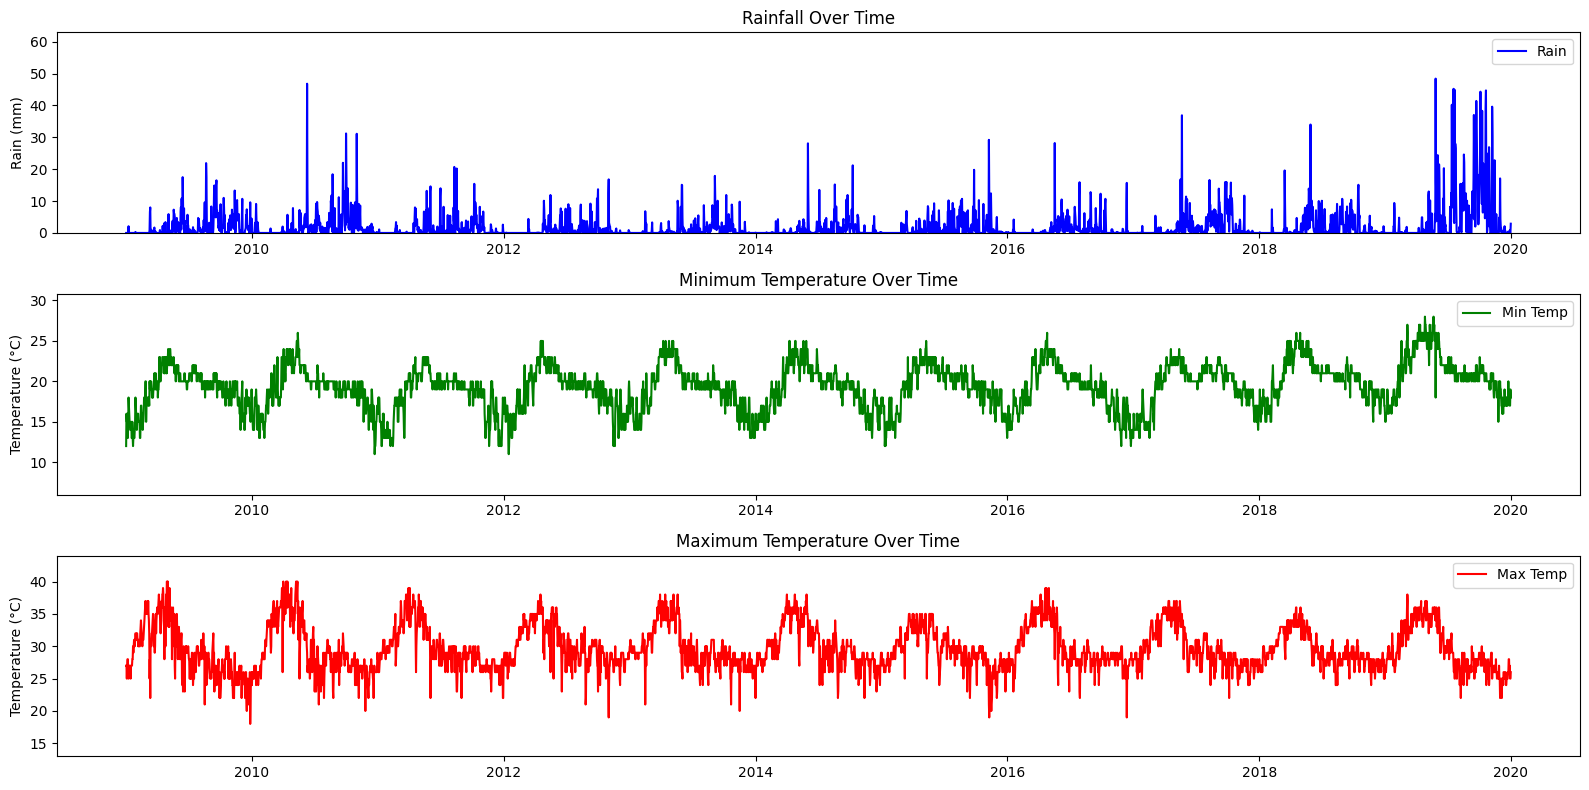

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(cd.index, cd['precipMM'], label='Rain', color='blue')
plt.title('Rainfall Over Time')
plt.ylabel('Rain (mm)')
plt.legend()
plt.ylim([0, cd['precipMM'].max() * 1.3])

plt.subplot(3, 1, 2)
plt.plot(cd.index, cd['mintempC'], label='Min Temp', color='green')
plt.title('Minimum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([cd['mintempC'].min() - 5, cd['mintempC'].max() * 1.1])

plt.subplot(3, 1, 3)
plt.plot(cd.index, cd['maxtempC'], label='Max Temp', color='red')
plt.title('Maximum Temperature Over Time')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([cd['maxtempC'].min() - 5, cd['maxtempC'].max() * 1.1])

plt.tight_layout()
plt.show()

####Average Monthly Rainfall(June-Sept)

In [ ]:
cd['date_time'] = pd.to_datetime(cd.index)

<ipython-input-16-35ad553a9ca8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_filtered['year'] = cd_filtered['date_time'].dt.year
<ipython-input-16-35ad553a9ca8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cd_filtered['month'] = cd_filtered['date_time'].dt.month


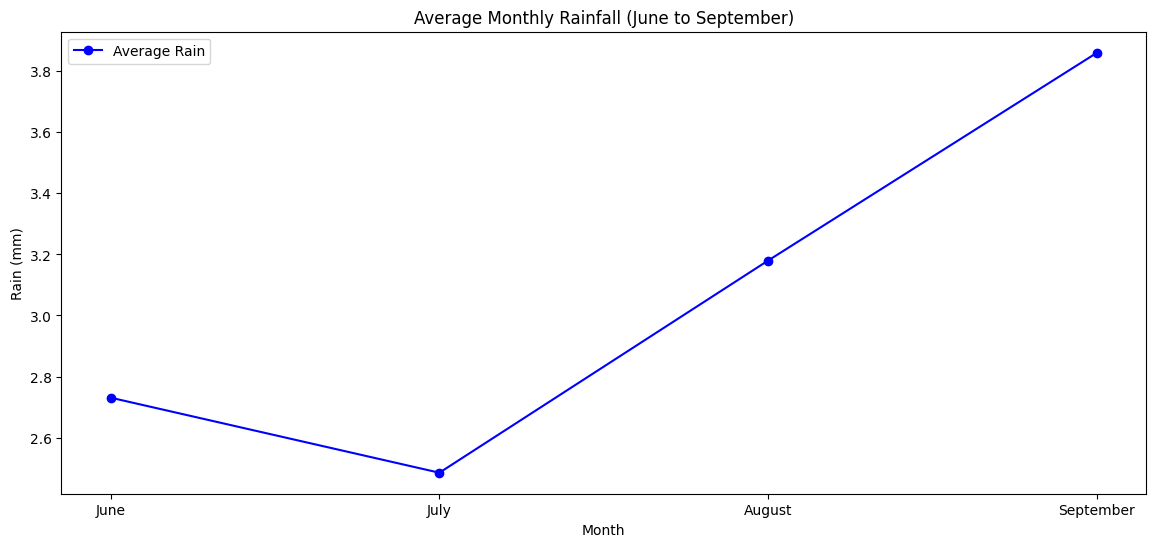

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd_filtered = cd[cd['date_time'].dt.month.isin([6, 7, 8, 9])]

cd_filtered['year'] = cd_filtered['date_time'].dt.year
cd_filtered['month'] = cd_filtered['date_time'].dt.month
monthly_avg = cd_filtered.groupby('month')['precipMM'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Average Rain', color='blue', marker='o')
plt.title('Average Monthly Rainfall (June to September)')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend()
plt.show()

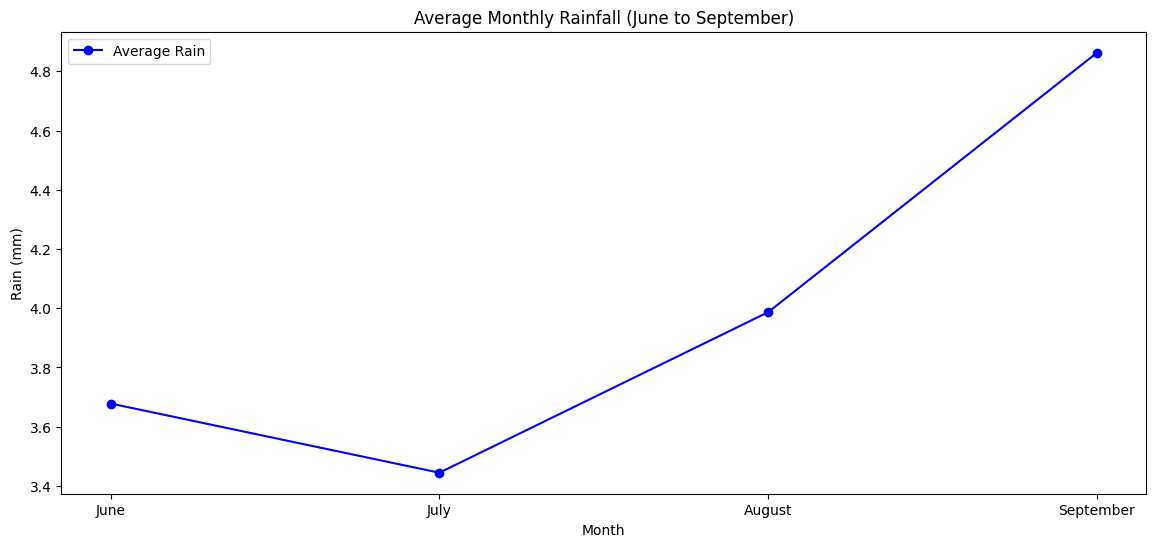

In [ ]:
temp = cd_filtered[cd_filtered['precipMM']>0]
monthly_avg = temp.groupby('month')['precipMM'].mean()

plt.figure(figsize=(14, 6))
plt.plot(monthly_avg.index, monthly_avg.values, label='Average Rain', color='blue', marker='o')
plt.title('Average Monthly Rainfall (June to September)')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.xticks([6, 7, 8, 9], ['June', 'July', 'August', 'September'])
plt.legend()
plt.show()

####Yearly Average Rainfall(June-Sept)

In [ ]:
cd_filtered.loc[:, 'year'] = cd_filtered['date_time'].dt.year
yearly_avg = cd_filtered.groupby('year')['precipMM'].mean().reset_index()
fig = px.line(yearly_avg, x='year', y='precipMM', title='Yearly Average Rainfall (June to September)',
              labels={'year': 'Year', 'precipMM': 'Average Rain (mm)'}, markers=True)

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Average Rain (mm)',
    legend_title='Legend',
    hovermode='x unified'
)
fig.show()

####Average Anuual Rainfall

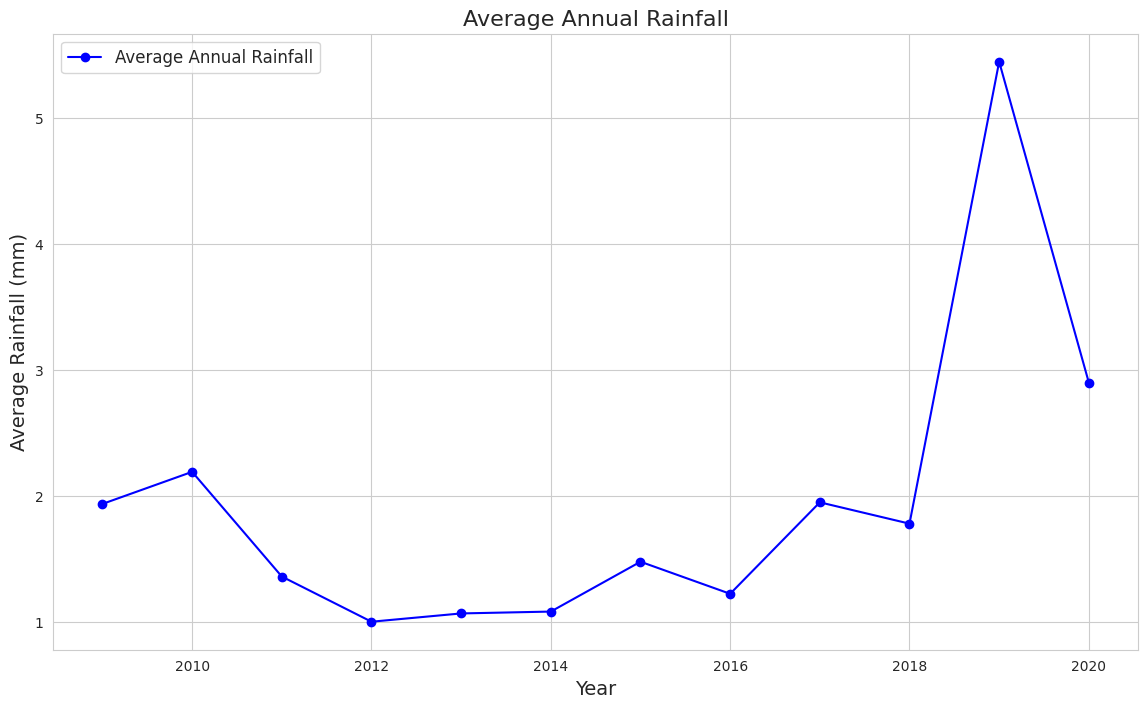

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
annual_rainfall = cd.groupby('year')['precipMM'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.plot(annual_rainfall['year'], annual_rainfall['precipMM'], marker='o', linestyle='-', color='blue', label='Average Annual Rainfall')

plt.title('Average Annual Rainfall', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Rainfall (mm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

####Monthly Trend Plots

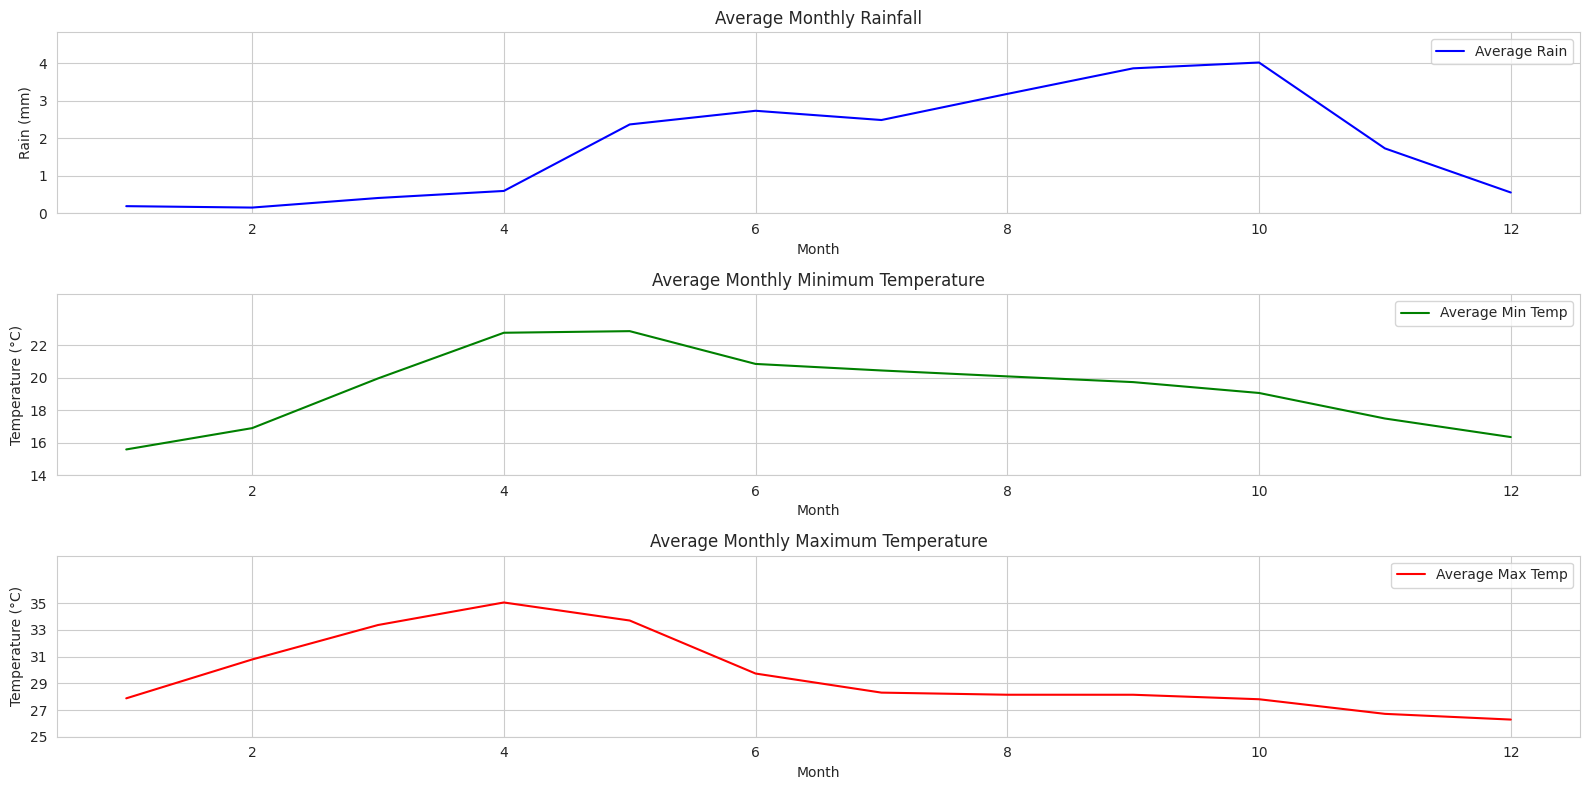

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd.set_index('date_time', inplace=True)
cd['Year'] = cd.index.year
cd['Month'] = cd.index.month
numeric_columns = cd.select_dtypes(include=[np.number]).columns
monthly_avg = cd[numeric_columns].groupby(cd['Month']).mean()
yearly_avg = cd[numeric_columns].groupby(cd['Year']).mean()
cd.reset_index(inplace=True)

plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(monthly_avg.index, monthly_avg['precipMM'], label='Average Rain', color='blue')
plt.title('Average Monthly Rainfall')
plt.xlabel('Month')
plt.ylabel('Rain (mm)')
plt.legend()
plt.ylim([0, monthly_avg['precipMM'].max() * 1.2])

plt.subplot(3, 1, 2)
plt.plot(monthly_avg.index, monthly_avg['mintempC'], label='Average Min Temp', color='green')
plt.title('Average Monthly Minimum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([monthly_avg['mintempC'].min() - 1, monthly_avg['mintempC'].max() * 1.1])
plt.yticks(range(int(monthly_avg['mintempC'].min()) - 1, int(monthly_avg['mintempC'].max()) + 2, 2))

plt.subplot(3, 1, 3)
plt.plot(monthly_avg.index, monthly_avg['maxtempC'], label='Average Max Temp', color='red')
plt.title('Average Monthly Maximum Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.ylim([monthly_avg['maxtempC'].min() - 1, monthly_avg['maxtempC'].max() * 1.1])
plt.yticks(range(int(monthly_avg['maxtempC'].min()) - 1, int(monthly_avg['maxtempC'].max()) + 2, 2))

plt.tight_layout()
plt.show()

####Yearly Trend Plots

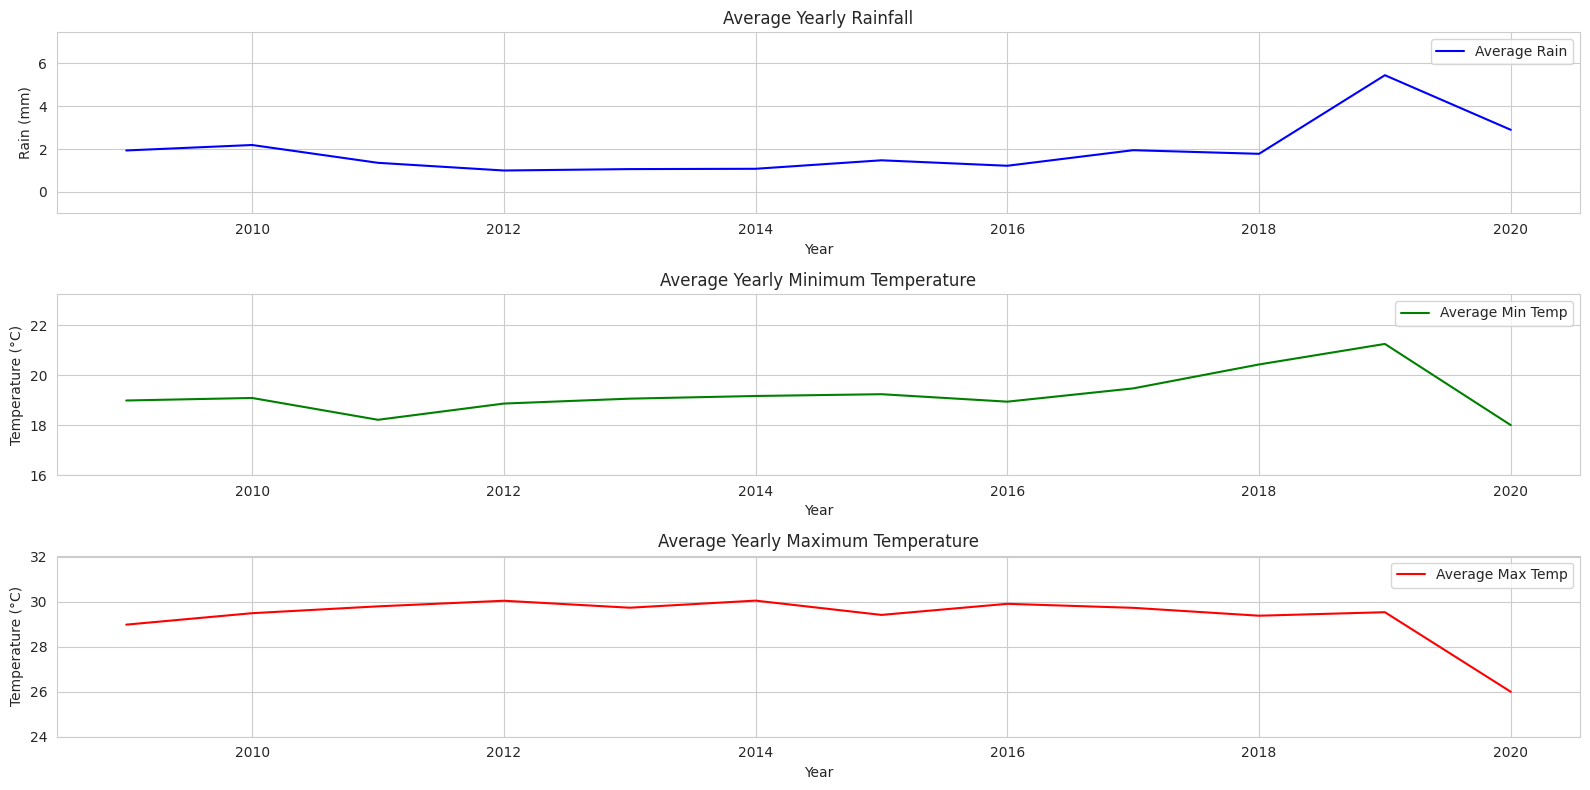

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(3, 1, 1)
plt.plot(yearly_avg.index, yearly_avg['precipMM'], label='Average Rain', color='blue')
plt.title('Average Yearly Rainfall')
plt.xlabel('Year')
plt.ylabel('Rain (mm)')
plt.ylim(yearly_avg['precipMM'].min() - 2, yearly_avg['precipMM'].max() + 2)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(yearly_avg.index, yearly_avg['mintempC'], label='Average Min Temp', color='green')
plt.title('Average Yearly Minimum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.ylim(yearly_avg['mintempC'].min() - 2, yearly_avg['mintempC'].max() + 2)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(yearly_avg.index, yearly_avg['maxtempC'], label='Average Max Temp', color='red')
plt.title('Average Yearly Maximum Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.ylim(yearly_avg['maxtempC'].min() - 2, yearly_avg['maxtempC'].max() + 2)
plt.legend()

plt.tight_layout()
plt.show()

####Plotting Features in Dataset

<Figure size 1600x1200 with 0 Axes>

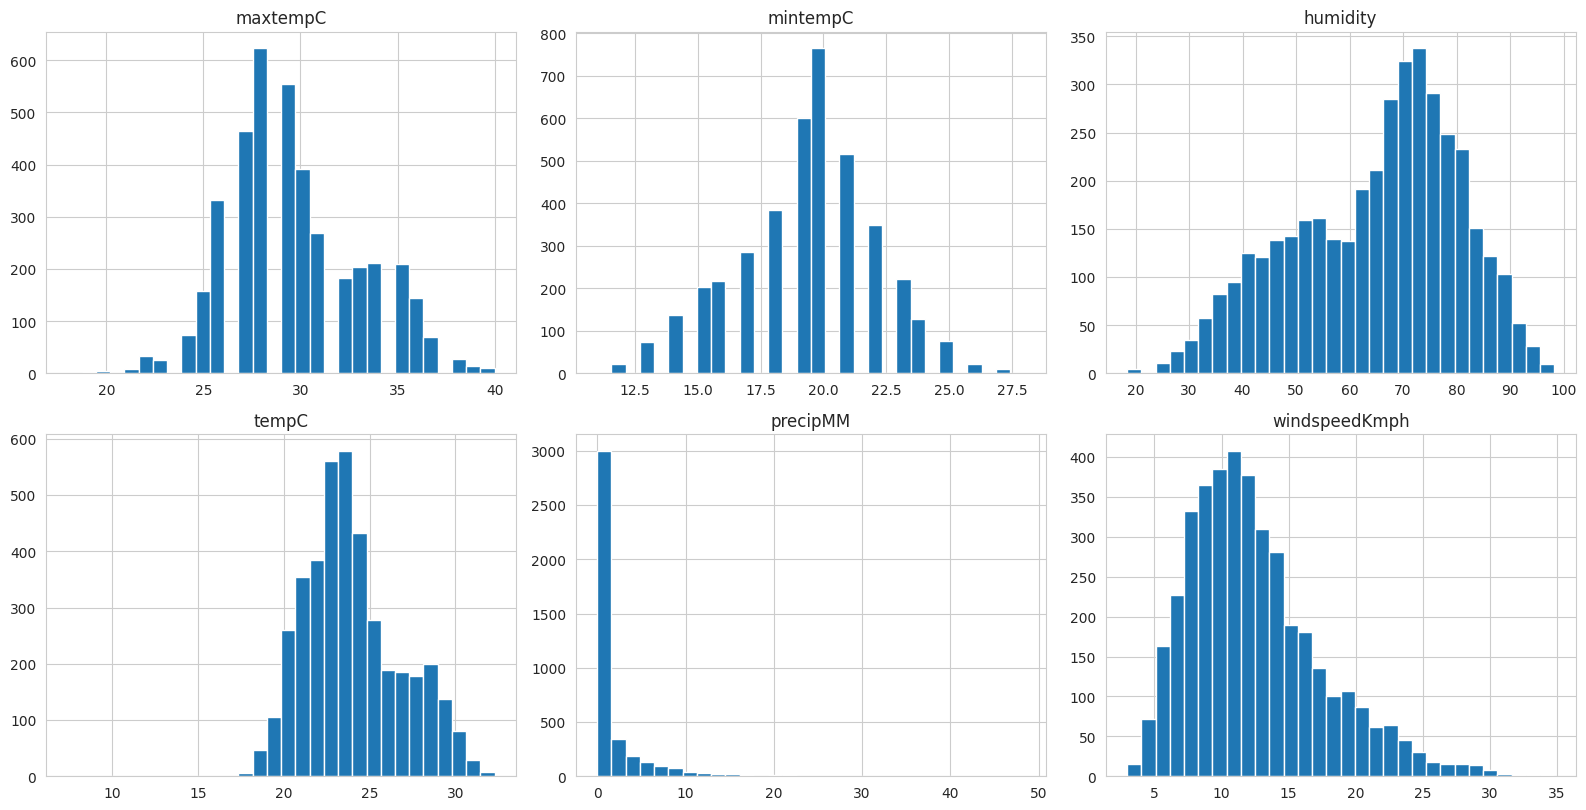

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])

plt.figure(figsize=(16, 12))
columns_of_interest = ['maxtempC', 'mintempC', 'humidity', 'tempC', 'precipMM', 'windspeedKmph']
cd[columns_of_interest].hist(bins=30, figsize=(16, 12), layout=(3, 3))
plt.tight_layout()
plt.show()


####Correlation Matrix

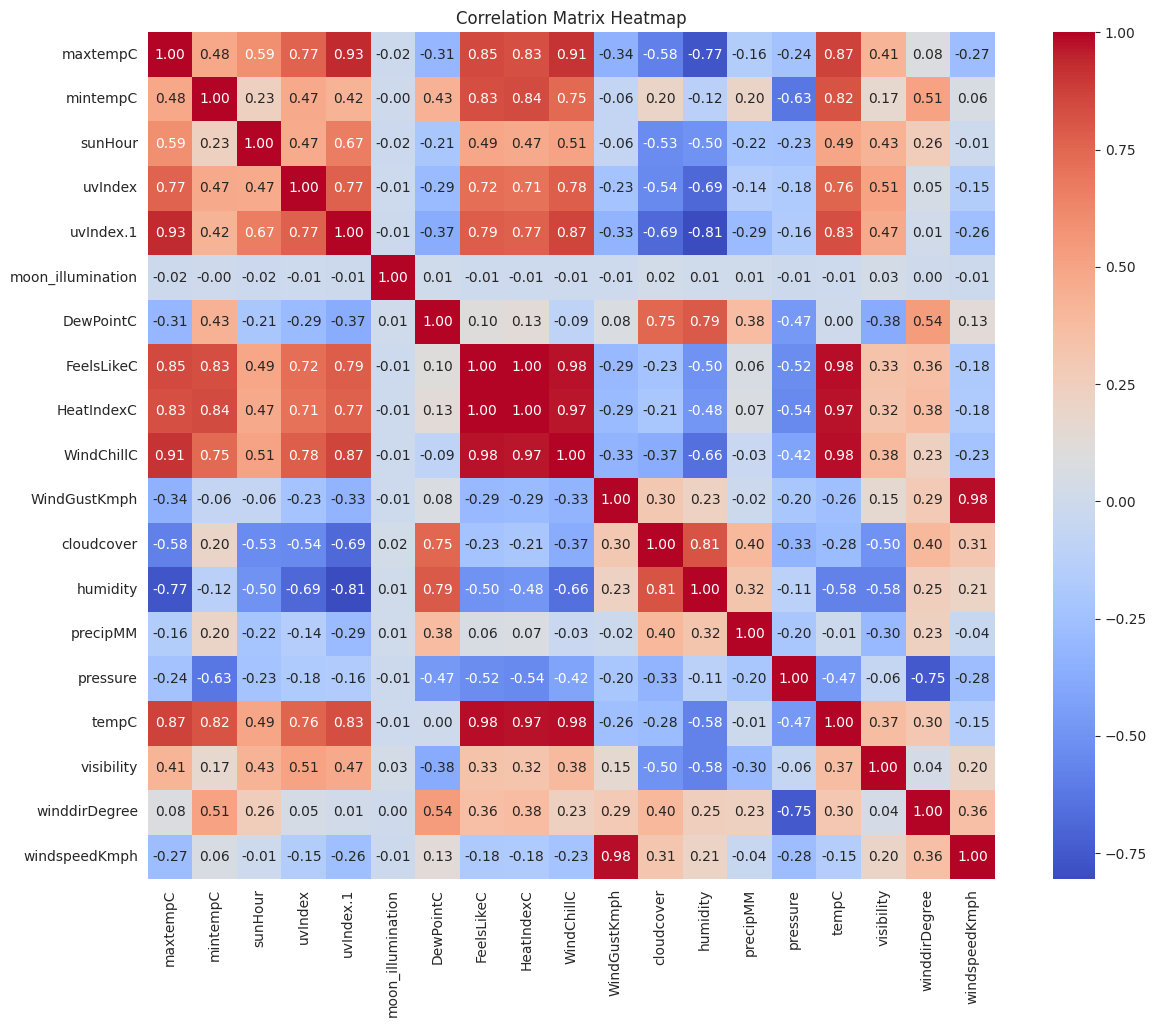

In [ ]:
corrdf = cd.drop(['date_time','year', 'Year', 'Month'], axis=1)
correlation_matrix = corrdf.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

####Daily, Mobthly and Yearly Average of Temp and Humidity

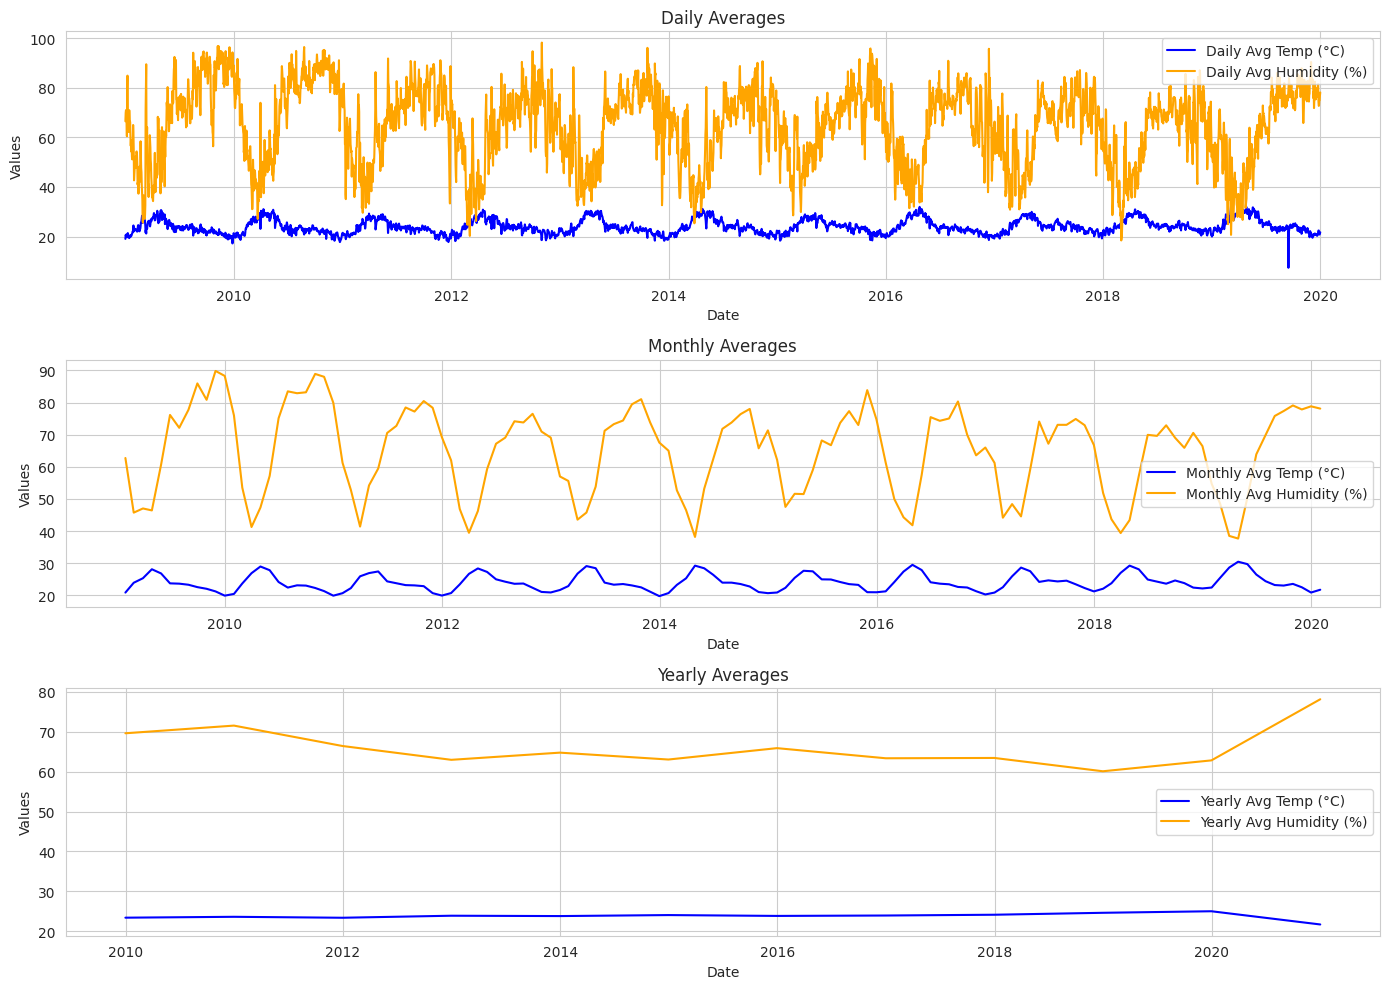

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd.set_index('date_time', inplace=True)
daily_data = cd.resample('D').mean()
monthly_data = cd.resample('M').mean()
yearly_data = cd.resample('Y').mean()
plt.figure(figsize=(14, 10))

# Daily Averages
plt.subplot(3, 1, 1)
plt.plot(daily_data['tempC'], label='Daily Avg Temp (°C)', color='blue')
plt.plot(daily_data['humidity'], label='Daily Avg Humidity (%)', color='orange')
plt.title('Daily Averages')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Monthly Averages
plt.subplot(3, 1, 2)
plt.plot(monthly_data['tempC'], label='Monthly Avg Temp (°C)', color='blue')
plt.plot(monthly_data['humidity'], label='Monthly Avg Humidity (%)', color='orange')
plt.title('Monthly Averages')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

# Yearly Averages
plt.subplot(3, 1, 3)
plt.plot(yearly_data['tempC'], label='Yearly Avg Temp (°C)', color='blue')
plt.plot(yearly_data['humidity'], label='Yearly Avg Humidity (%)', color='orange')
plt.title('Yearly Averages')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()

plt.tight_layout()
plt.show()


####Features Relation

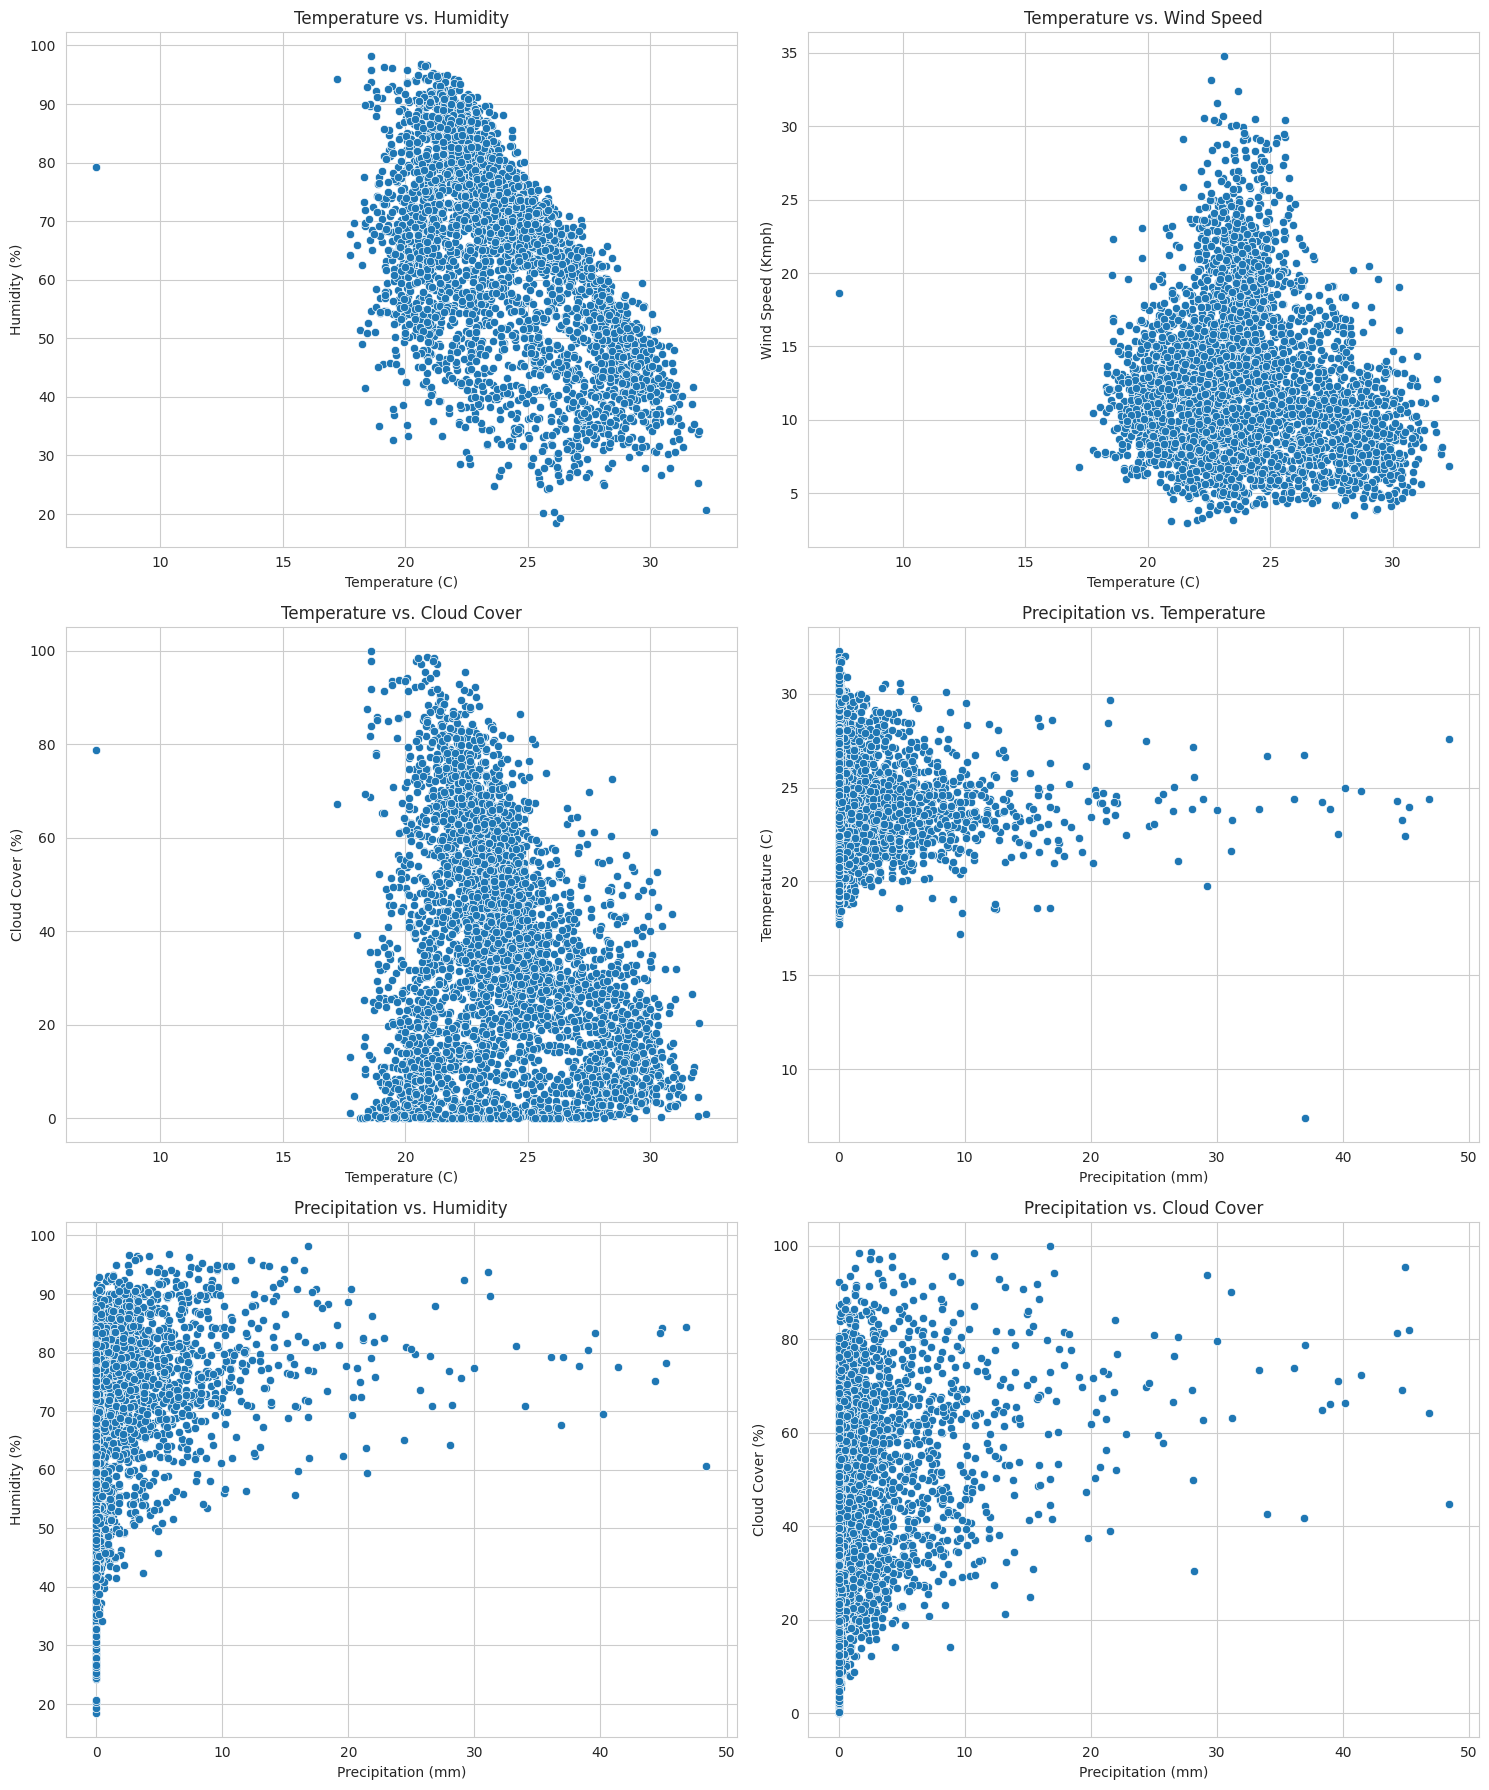

In [ ]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))

# Plot 1: Temperature vs. Humidity
sns.scatterplot(ax=axes[0, 0], x='tempC', y='humidity', data=cd)
axes[0, 0].set_title('Temperature vs. Humidity')
axes[0, 0].set_xlabel('Temperature (C)')
axes[0, 0].set_ylabel('Humidity (%)')

# Plot 2: Temperature vs. Wind Speed
sns.scatterplot(ax=axes[0, 1], x='tempC', y='windspeedKmph', data=cd)
axes[0, 1].set_title('Temperature vs. Wind Speed')
axes[0, 1].set_xlabel('Temperature (C)')
axes[0, 1].set_ylabel('Wind Speed (Kmph)')

# Plot 3: Temperature vs. Cloud Cover
sns.scatterplot(ax=axes[1, 0], x='tempC', y='cloudcover', data=cd)
axes[1, 0].set_title('Temperature vs. Cloud Cover')
axes[1, 0].set_xlabel('Temperature (C)')
axes[1, 0].set_ylabel('Cloud Cover (%)')

# Plot 4: Precipitation vs. Temperature
sns.scatterplot(ax=axes[1, 1], x='precipMM', y='tempC', data=cd)
axes[1, 1].set_title('Precipitation vs. Temperature')
axes[1, 1].set_xlabel('Precipitation (mm)')
axes[1, 1].set_ylabel('Temperature (C)')

# Plot 5: Precipitation vs. Humidity
sns.scatterplot(ax=axes[2, 0], x='precipMM', y='humidity', data=cd)
axes[2, 0].set_title('Precipitation vs. Humidity')
axes[2, 0].set_xlabel('Precipitation (mm)')
axes[2, 0].set_ylabel('Humidity (%)')

# Plot 6: Precipitation vs. Cloud Cover
sns.scatterplot(ax=axes[2, 1], x='precipMM', y='cloudcover', data=cd)
axes[2, 1].set_title('Precipitation vs. Cloud Cover')
axes[2, 1].set_xlabel('Precipitation (mm)')
axes[2, 1].set_ylabel('Cloud Cover (%)')

plt.tight_layout()
plt.show()


####Box Plot Featuring

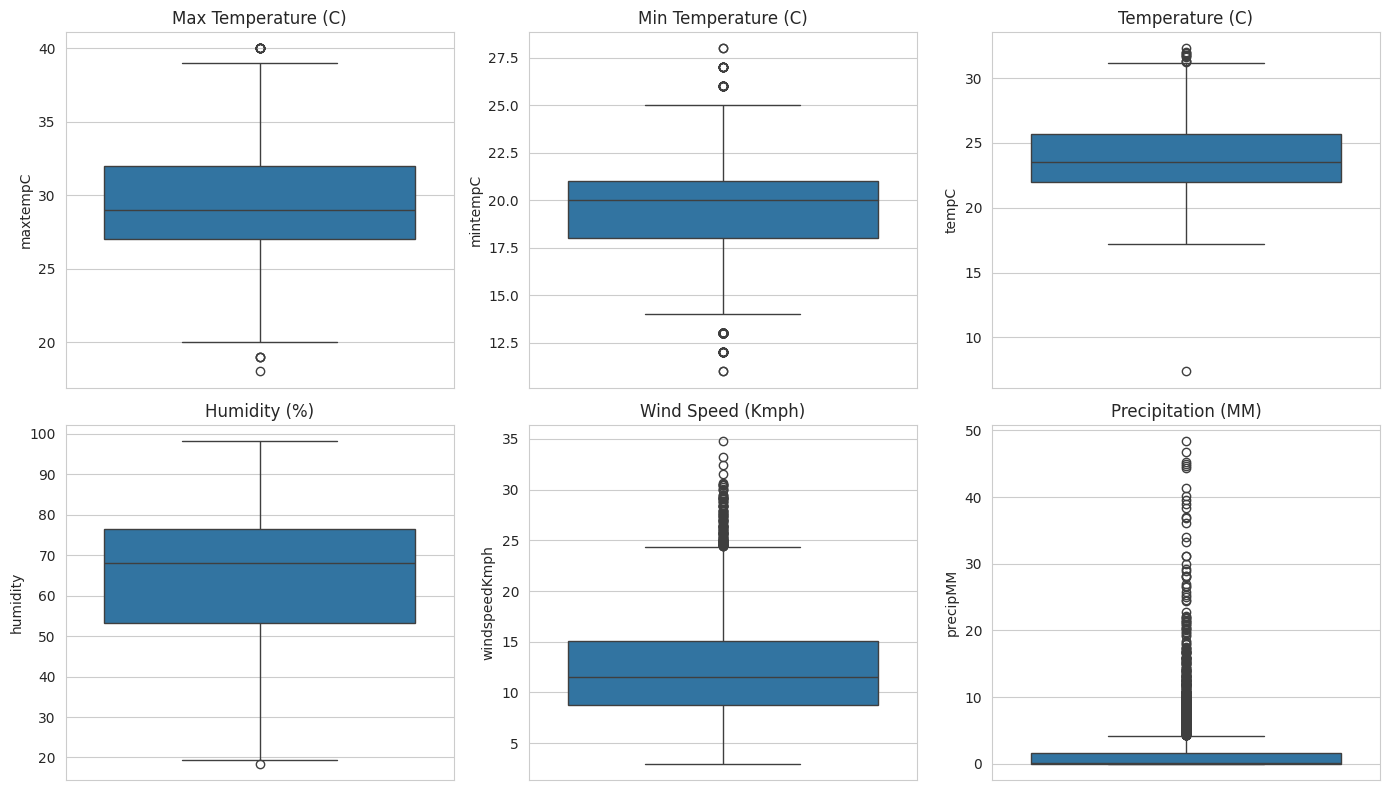

In [ ]:
plt.figure(figsize=(14, 8))
plt.subplot(2, 3, 1)
sns.boxplot(y=cd['maxtempC'])
plt.title('Max Temperature (C)')

plt.subplot(2, 3, 2)
sns.boxplot(y=cd['mintempC'])
plt.title('Min Temperature (C)')

plt.subplot(2, 3, 3)
sns.boxplot(y=cd['tempC'])
plt.title('Temperature (C)')

plt.subplot(2, 3, 4)
sns.boxplot(y=cd['humidity'])
plt.title('Humidity (%)')

plt.subplot(2, 3, 5)
sns.boxplot(y=cd['windspeedKmph'])
plt.title('Wind Speed (Kmph)')

plt.subplot(2, 3, 6)
sns.boxplot(y=cd['precipMM'])
plt.title('Precipitation (MM)')

plt.tight_layout()
plt.show()


####Year Wise Average Temperature for all Months

In [ ]:
cd.reset_index(inplace=True)

In [ ]:
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
cd['month'] = cd['date_time'].dt.month
cd['hour'] = cd['date_time'].dt.hour

monthly_avg_temperature = cd.groupby(['year', 'month'])['tempC'].mean().reset_index()
monthly_avg_temperature.columns = ['Year', 'Month', 'Avg_Temperature']
month_dict = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}
monthly_avg_temperature['Month'] = monthly_avg_temperature['Month'].map(month_dict)
monthly_avg_temperature=monthly_avg_temperature.drop(132)

In [ ]:
import warnings
warnings.filterwarnings("ignore")
px.scatter(monthly_avg_temperature, x="Month", y="Avg_Temperature", animation_frame="Year",
           size="Avg_Temperature", color="Avg_Temperature", hover_name="Avg_Temperature", range_y=[10,40])

####Correation UV Index and Max Temp

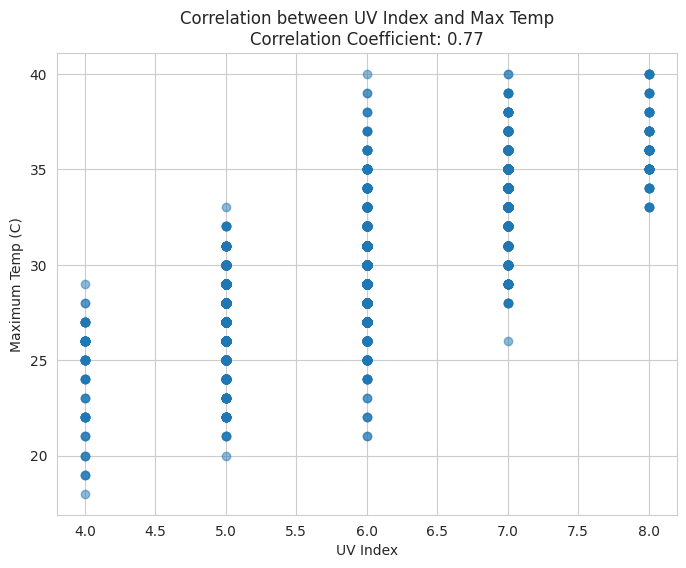

Correlation Coefficient: 0.77


In [ ]:
correlation = cd['uvIndex'].corr(cd['maxtempC'])
plt.figure(figsize=(8, 6))
plt.scatter(cd['uvIndex'], cd['maxtempC'], alpha=0.5)
plt.title(f'Correlation between UV Index and Max Temp\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('UV Index')
plt.ylabel('Maximum Temp (C)')
plt.grid(True)
plt.show()

print(f'Correlation Coefficient: {correlation:.2f}')

####Correlation Actual Temp and Feels Like Temp

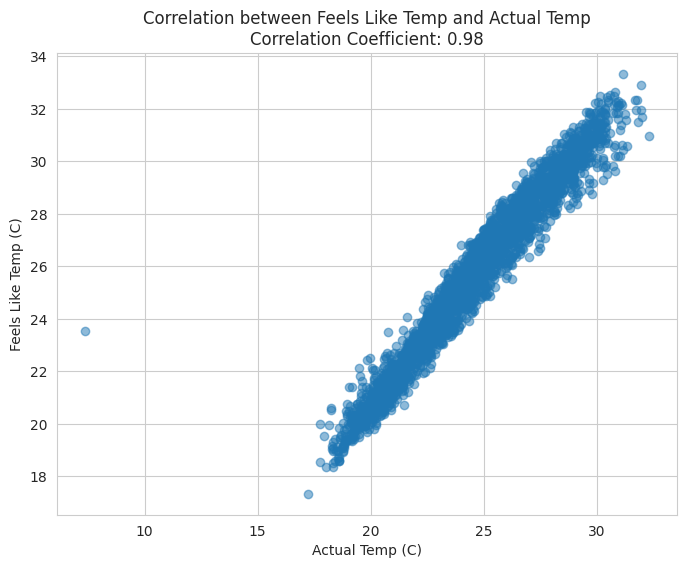

Correlation Coefficient: 0.98


In [ ]:
correlation = cd['tempC'].corr(cd['FeelsLikeC'])
plt.figure(figsize=(8, 6))
plt.scatter(cd['tempC'], cd['FeelsLikeC'], alpha=0.5)
plt.title(f'Correlation between Feels Like Temp and Actual Temp\nCorrelation Coefficient: {correlation:.2f}')
plt.xlabel('Actual Temp (C)')
plt.ylabel('Feels Like Temp (C)')
plt.grid(True)
plt.show()

print(f'Correlation Coefficient: {correlation:.2f}')

####Gamma Distribution Fit for Rain

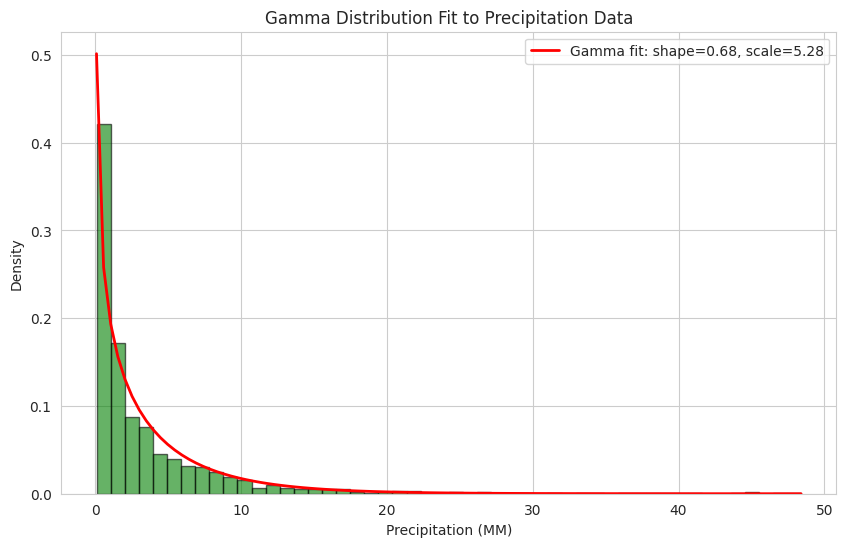

In [ ]:
import scipy.stats as stats
precip_data = cd['precipMM'][cd['precipMM'] > 0]
shape, loc, scale = stats.gamma.fit(precip_data, floc=0)
plt.figure(figsize=(10, 6))
plt.hist(precip_data, bins=50, density=True, alpha=0.6, color='g', edgecolor='black')

x = np.linspace(precip_data.min(), precip_data.max(), 100)
gamma_pdf = stats.gamma.pdf(x, shape, loc, scale)
plt.plot(x, gamma_pdf, 'r-', lw=2, label=f'Gamma fit: shape={shape:.2f}, scale={scale:.2f}')

plt.title('Gamma Distribution Fit to Precipitation Data')
plt.xlabel('Precipitation (MM)')
plt.ylabel('Density')
plt.legend()
plt.show()


####PDF Plot Temperature

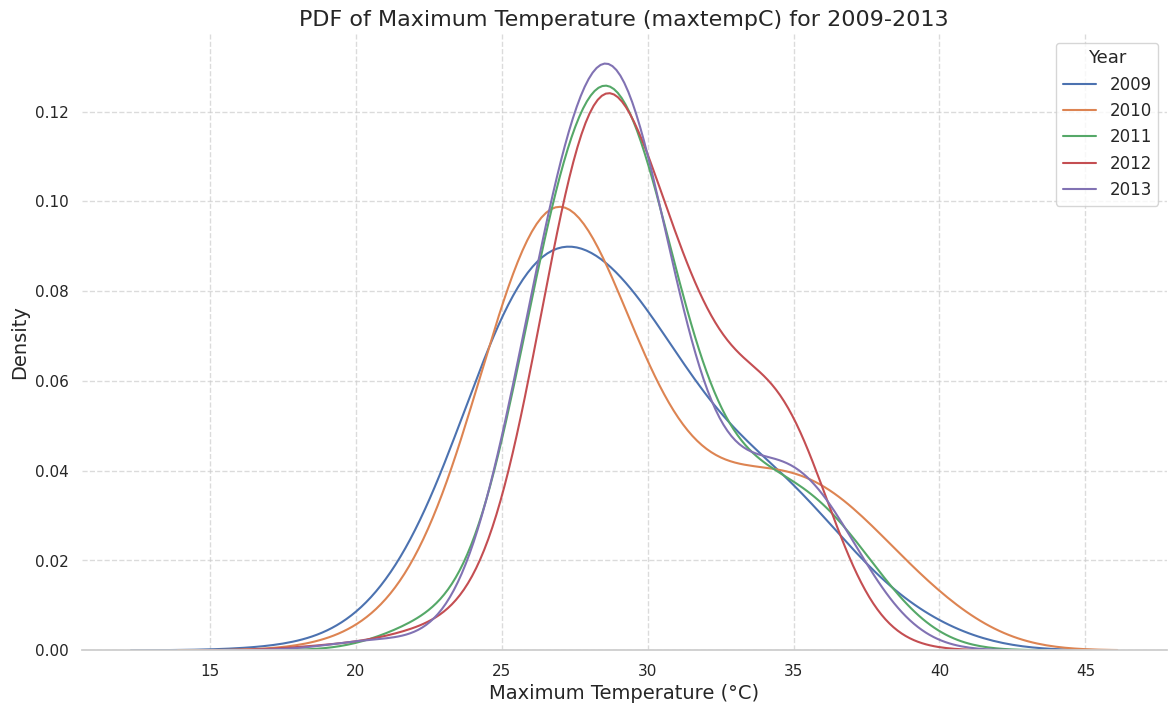

In [ ]:
cd.reset_index(inplace=True)
cd['date_time'] = pd.to_datetime(cd['date_time'])
cd['year'] = cd['date_time'].dt.year
filtered_data = cd[(cd['year'] >= 2009) & (cd['year'] <= 2013)]
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))

for year, group in filtered_data.groupby('year'):
    sns.kdeplot(group['maxtempC'].dropna(), fill=False, bw_adjust=1.5, label=str(year))

plt.title('PDF of Maximum Temperature (maxtempC) for 2009-2013', fontsize=16)
plt.xlabel('Maximum Temperature (°C)', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Year', fontsize=12, title_fontsize='13')
sns.despine(left=True)
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


###Pre Processing

In [ ]:
!pip install CatBoost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 10.3 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

###Model Training and Testing

In [ ]:
cd['month'] = cd['date_time'].dt.month
cd['year'] = cd['date_time'].dt.year
cd['day'] = cd['date_time'].dt.day
cd['dayofweek'] = cd['date_time'].dt.dayofweek

In [ ]:
print(cd.columns)

Index(['index', 'date_time', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'year', 'Year', 'Month', 'month', 'hour', 'day',
       'dayofweek'],
      dtype='object')


In [ ]:
cd['moonrise'] = pd.to_datetime(data['moonrise'], format='%I:%M %p', errors='coerce').dt.time
cd['moonset'] = pd.to_datetime(data['moonset'], format='%I:%M %p', errors='coerce').dt.time
cd['sunrise'] = pd.to_datetime(data['sunrise'], format='%I:%M %p', errors='coerce').dt.time
cd['sunset'] = pd.to_datetime(data['sunset'], format='%I:%M %p', errors='coerce').dt.time

def time_to_minutes(time):
    return time.hour * 60 + time.minute

cd['moonrise_minutes'] = cd['moonrise'].apply(time_to_minutes)
cd['moonset_minutes'] = cd['moonset'].apply(time_to_minutes)
cd['sunrise_minutes'] = cd['sunrise'].apply(time_to_minutes)
cd['sunset_minutes'] = cd['sunset'].apply(time_to_minutes)

cd = cd.drop(columns=['moonrise', 'moonset', 'sunrise', 'sunset'])

AttributeError: 'float' object has no attribute 'hour'

In [ ]:
cd['moonrise'] = pd.to_datetime(data['moonrise'], format='%I:%M %p', errors='coerce').dt.time
cd['moonrise']

,moonrise
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4013,NaN
4014,NaN
4015,NaN
4016,NaN


In [ ]:
cd['moonset']

,moonset
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
4013,NaN
4014,NaN
4015,NaN
4016,NaN


In [ ]:
cd['month'] = cd['date_time'].dt.month
cd['year'] = cd['date_time'].dt.year
cd['day'] = cd['date_time'].dt.day
cd['dayofweek'] = cd['date_time'].dt.dayofweek

KeyError: 'date_time'

In [ ]:
cd = cd.dropna()

In [ ]:
print(cd.columns)

Index(['index', 'date_time', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'year', 'Year', 'Month', 'month', 'hour',
       'moonrise_minutes', 'moonset_minutes', 'sunrise_minutes',
       'sunset_minutes', 'day', 'dayofweek'],
      dtype='object')


In [ ]:
X = cd.drop(columns=['precipMM', 'date_time'])
y = cd['precipMM']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numeric_features = ['maxtempC', 'mintempC', 'sunHour',
       'uvIndex', 'moon_illumination', 'DewPointC', 'FeelsLikeC', 'HeatIndexC',
       'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph',
        'moonrise_minutes', 'moonset_minutes','sunrise_minutes',
          'sunset_minutes','year','month', 'day', 'dayofweek' ]
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')),  ('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features)])

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [ ]:
print(cd.columns)

Index(['index', 'date_time', 'maxtempC', 'mintempC', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'DewPointC', 'FeelsLikeC',
       'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity',
       'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree',
       'windspeedKmph', 'year', 'Year', 'Month', 'month', 'hour',
       'moonrise_minutes', 'moonset_minutes', 'sunrise_minutes',
       'sunset_minutes', 'day', 'dayofweek'],
      dtype='object')


In [ ]:
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100),
    'XGBoost Regressor': xgb.XGBRegressor(),
    'CatBoost Regressor': CatBoostRegressor(silent=True),
    'MLP Regressor NN': MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000)
}
results = {}
best_model_name = None
best_r2 = -float('inf')
for name, model in models.items():
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', model)])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred = np.maximum(y_pred, 0)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {'mae': mae, 'mse': mse, 'rmse': rmse, 'r2': r2}
    models = {}
    models[name] = clf

    print(f'Model: {name}')
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Square Error: {rmse:.4f}")
    print(f"R-squared: {r2:.4f}")
    print('-'*30)

    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name

print(f"Best Model: {best_model_name}")
print(f"Best Model R-squared: {best_r2:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning:

Skipping features without any observed values: ['maxtempC' 'mintempC' 'sunHour' 'uvIndex' 'moon_illumination' 'DewPointC'
 'FeelsLikeC' 'HeatIndexC' 'WindChillC' 'WindGustKmph' 'cloudcover'
 'humidity' 'pressure' 'tempC' 'visibility' 'winddirDegree'
 'windspeedKmph' 'year' 'month' 'day' 'dayofweek']. At least one non-missing value is needed for imputation with strategy='mean'.



ValueError: Input y contains NaN.

In [ ]:
param_dist = {
    'n_estimators': [100, 500, 700],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

xgb_model = XGBRegressor()
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=5,
    scoring='r2',
    cv=3,
    verbose=1,
    n_jobs=-1
)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', random_search)])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"R-squared: {r2:.4f}")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
R-squared: 0.6896


In [ ]:
model = models['MLP Regressor NN']

In [ ]:
X_test.sort_index(inplace=True)
y_test.sort_index(inplace=True)

In [ ]:
y_pred = model.predict(X_test)
y_pred = np.maximum(y_pred, 0)

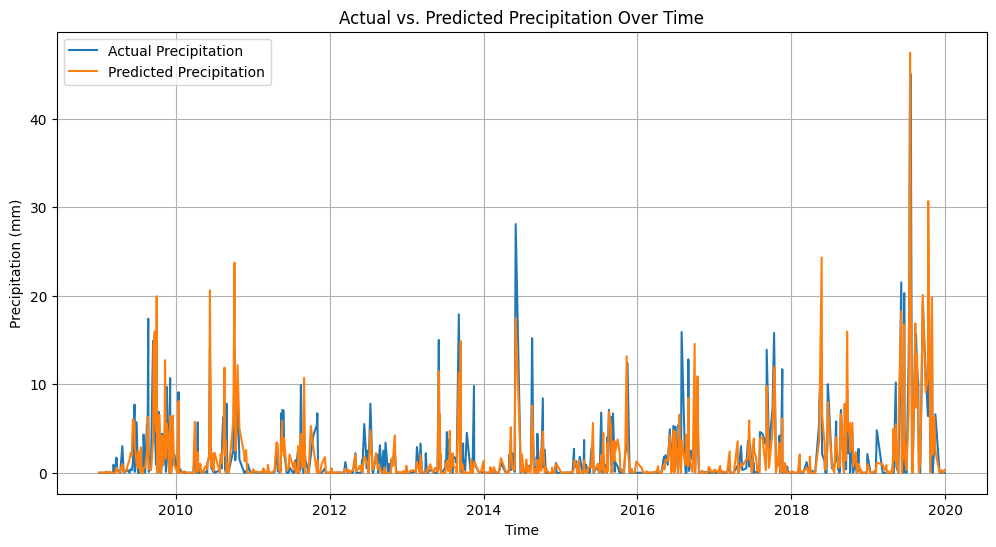

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test.values, label='Actual Precipitation')
plt.plot(y_test.index, y_pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
season = cd[cd['month'].isin([6, 7, 8, 9])]
test = season['precipMM']
season = season.drop(['precipMM'], axis=1)

In [ ]:
season.sort_index(inplace=True)
test.sort_index(inplace=True)

In [ ]:
pred = model.predict(season)
pred = np.maximum(pred, 0)

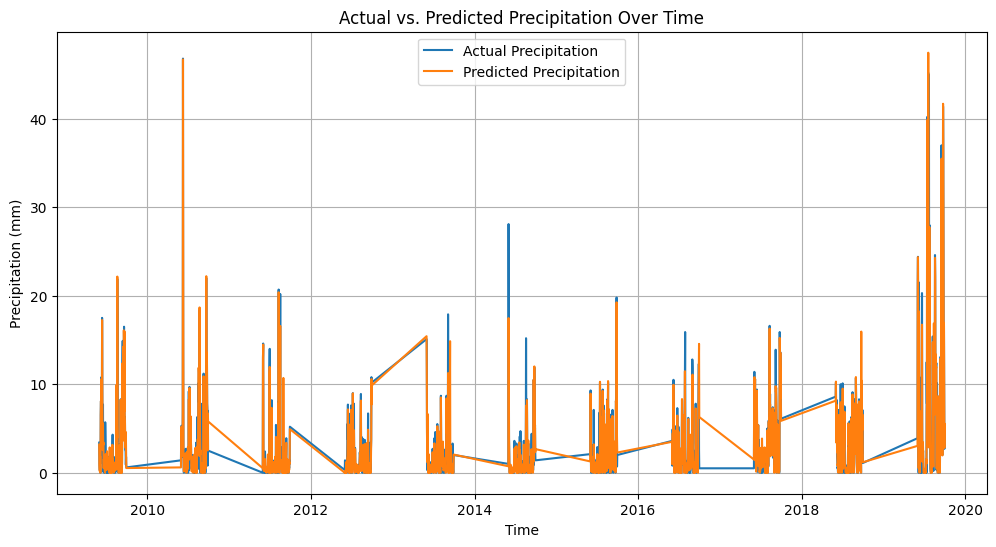

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual Precipitation')
plt.plot(test.index, pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
cd.sort_index(inplace=True)

In [ ]:
x = cd.drop(['precipMM'], axis=1)
y = cd['precipMM']

In [ ]:
ann_pred = model.predict(x)

In [ ]:
ann_pred = np.maximum(ann_pred, 0)

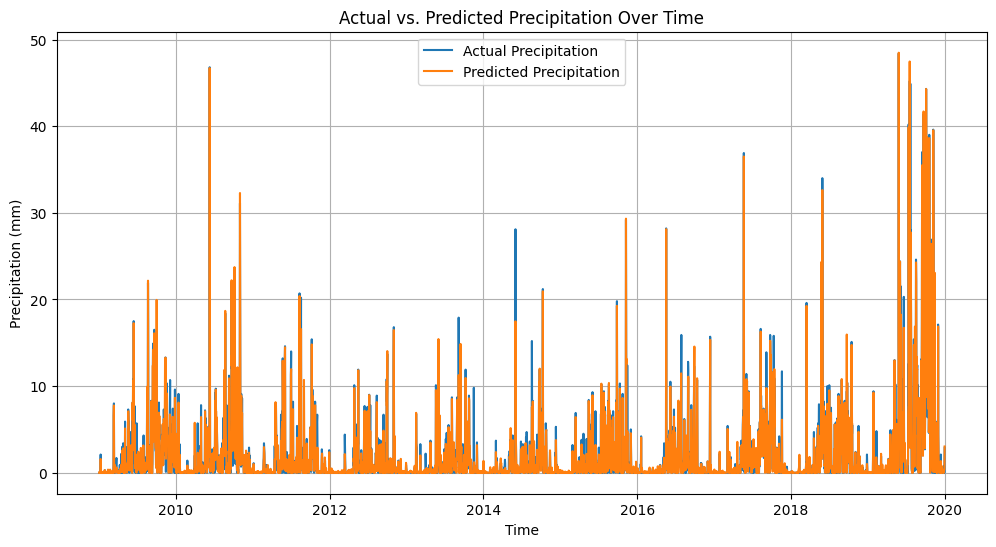

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(y.index, y, label='Actual Precipitation')
plt.plot(y.index, ann_pred, label='Predicted Precipitation')
plt.xlabel('Time')
plt.ylabel('Precipitation (mm)')
plt.title('Actual vs. Predicted Precipitation Over Time')
plt.legend()
plt.grid(True)
plt.show()